#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [6]:
import numpy as np
from itertools import product
import matplotlib as plt
import random
import time as t
from matplotlib import pyplot as plt


In [7]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

In [13]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  def solve_knapsack_brute_force(self):
    i = 0
    best_perm = []
    act_weight = 0
    act_profit = 0
    best_weight = 0
    best_profit = 0

    combinations = list(product([True, False], repeat = len(self.weights)))
    for combination in combinations:
      i = 0
      act_weight = 0
      act_profit = 0
      for element in combination:
        if element:
          if act_weight + self.weights[i] > self.capacity:
            break
          else:
            act_weight += self.weights[i]
            act_profit += self.profits[i]
            if act_profit >= best_profit:
              best_weight = act_weight
              best_profit = act_profit
              best_perm = combination
        i += 1
    print(f'indexes: {best_perm}\n')
    print(f'total weight: {best_weight}\n')
    print(f'total profit: {best_profit}\n')
    return best_perm

  def solve_knapsack_pw_ratio(self):
    results = []
    in_sack = []
    act_weight = 0
    act_profit = 0
    for i in range(len(self.weights)):
      w = self.profits[i] / self.weights[i]
      results.append((w, i))
    
    results.sort(reverse=True)

    for element in results:
        if act_weight + self.weights[element[1]] > self.capacity:
          print(f'indexes: {in_sack}\n')
          print(f'total weight: {act_weight}\n')
          print(f'total profit: {act_profit}\n')
          return in_sack
        else:
          act_weight += self.weights[element[1]]
          act_profit += self.profits[element[1]]
          in_sack.append(element[1])
  def add_element(self):
    self.weights = np.append(self.weights, [random.randint(1, 30)])
    self.profits = np.append(self.profits, [random.randint(1, 30)])
  
  def time_brute_force(self):
    start = t.time()
    self.solve_knapsack_brute_force()
    stop = t.time()
    return(stop - start)

  def time_pw_ratio(self):
    start = t.time()
    self.solve_knapsack_pw_ratio()
    stop = t.time()
    return(stop - start)
  
  def plot_brute_force(self, n):
    times = []
    num_of_elements = []
    i = len(self.weights)
    while i <= n:
      self.add_element()
      num_of_elements.append(i)
      times.append(self.time_brute_force)
      i += 1
    plt.plot(num_of_elements, times)
    plt.xlabel("n elements")
    plt.ylabel("times in seconds")
    plt.legend()
    plt.savefig("Times.jpg")
  def plot_pw_ratio(self, n):
    times = []
    num_of_elements = []
    i = len(self.weights)
    while i <= n:
      self.add_element()
      num_of_elements.append(i)
      times.append(self.time_pw_ratio())
      i += 1
    plt.plot(num_of_elements, times)
    plt.xlabel("n elements")
    plt.ylabel("times in seconds")
    plt.legend()
    plt.savefig("Times.jpg")


indexes: (False, True, True, False)

total weight: 8

total profit: 17

indexes: [3, 1]

total weight: 5

total profit: 14



[3, 1]

Wnioski uzyskane na podstawie przeprowadzonych testow:
- wynik działania obu algorytmów moze sie od siebie róznić
- metoda brute force daje zawsze poprawne rozwiazanie jednak ze wzgledu na swoja wysoka zlożonosc obliczniowa, ciezko ja stosowac w praktyce dla przypadkow o duzej ilosci elementow ( wykres dla metody brute force zostal umieszczony poniżej)
- metoda korzystajaca z rozwiazania wedlug heurystyki, ma o wiele nizsza zloznosc obliczeniowa, jednak nie gwarantuje optymalnego rozwiazania, nawet w przedstawionym przykladzie plecaka metoda ta zwraca niepoprawny wynik.

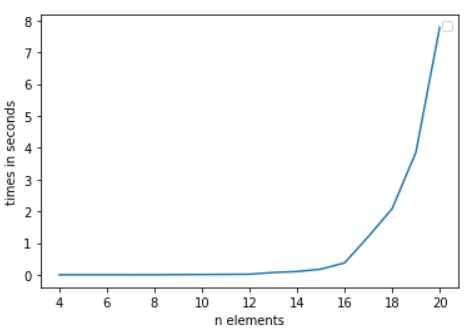

Rozwiązanie dla metody Brute Force:
Waga - 8, Profit - 17, Indeksy - 1,2

Rozwiązanie dla metody herystyki:
Waga - 5, Profit - 14, Indeksy - 1,3

Wykres dla rozwiązania pw_ratio:


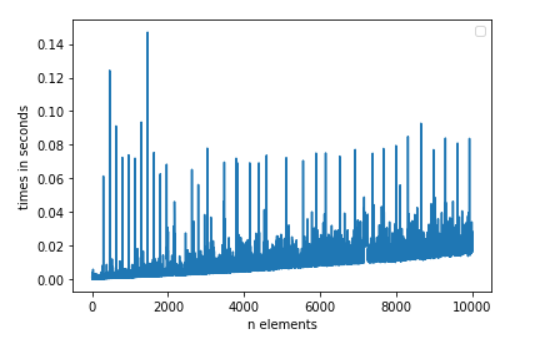